# Compare different scenarios 

In [1]:
import sys
sys.path.append('G:/My Drive/Research/adaptation_abm/code')
import model.model as mod
import model.base_inputs as inp
import plot.scenario_comparison as plt_sc
import plot.single_run as plt
import imp
import numpy as np
import pickle
import copy
imp.reload(plt)
imp.reload(mod)

<module 'model.model' from 'G:/My Drive/Research/adaptation_abm/code\\model\\model.py'>

## Define scenarios 

In [2]:
# load default params
inp_base = inp.compile()
#### OR ####
# load from POM experiment
f = '../../outputs/POM/different max livestock/input_params_0.pkl'
inp_base = pickle.load(open(f, 'rb'))

# manually specify some variables (common to all scenarios)
inp_base['model']['T'] = 100
inp_base['model']['n_agents'] = 30
inp_base['model']['exp_name'] = 'scenario_compare'
inp_base['agents']['adap_type'] = 'always'
inp_base['model']['seed'] = 0

# define some scenarios
scenarios = {
    'baseline' : {'model' : {'adaptation_option' : 'none'}},
    'insurance' : {'model' : {'adaptation_option' : 'insurance'}},
    'cover_crop' : {'model' : {'adaptation_option' : 'cover_crop'}},
}

In [3]:
inp_base['adaptation']['insurance']['cost_factor'] = 0

## Run the model

In [4]:
mods = {}
for name, vals in scenarios.items():
    # change the params
    params = copy.copy(inp_base)
    for k, v in vals.items():
        for k2, v2 in v.items():
            params[k][k2] = v2
    
    # initialize and run model
    m = mod.Model(params)
    for t in range(m.T):
        m.step()
    mods[name] = m

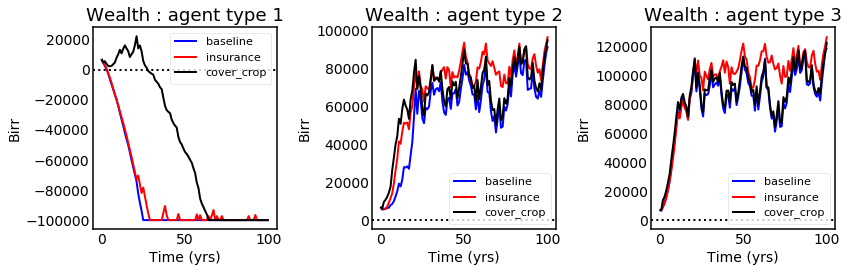

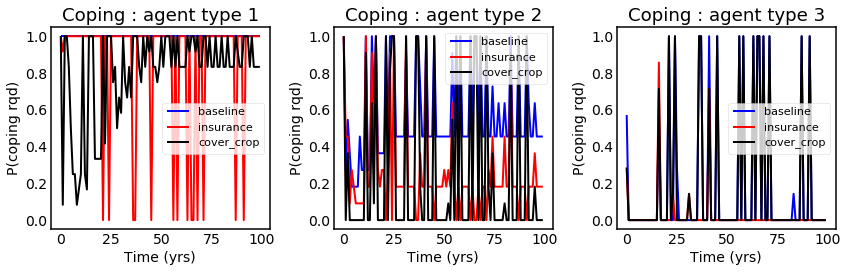

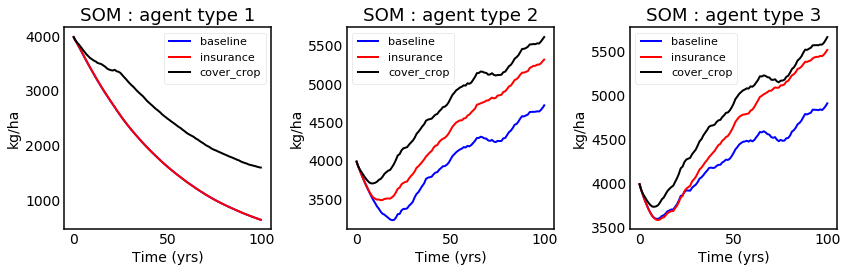

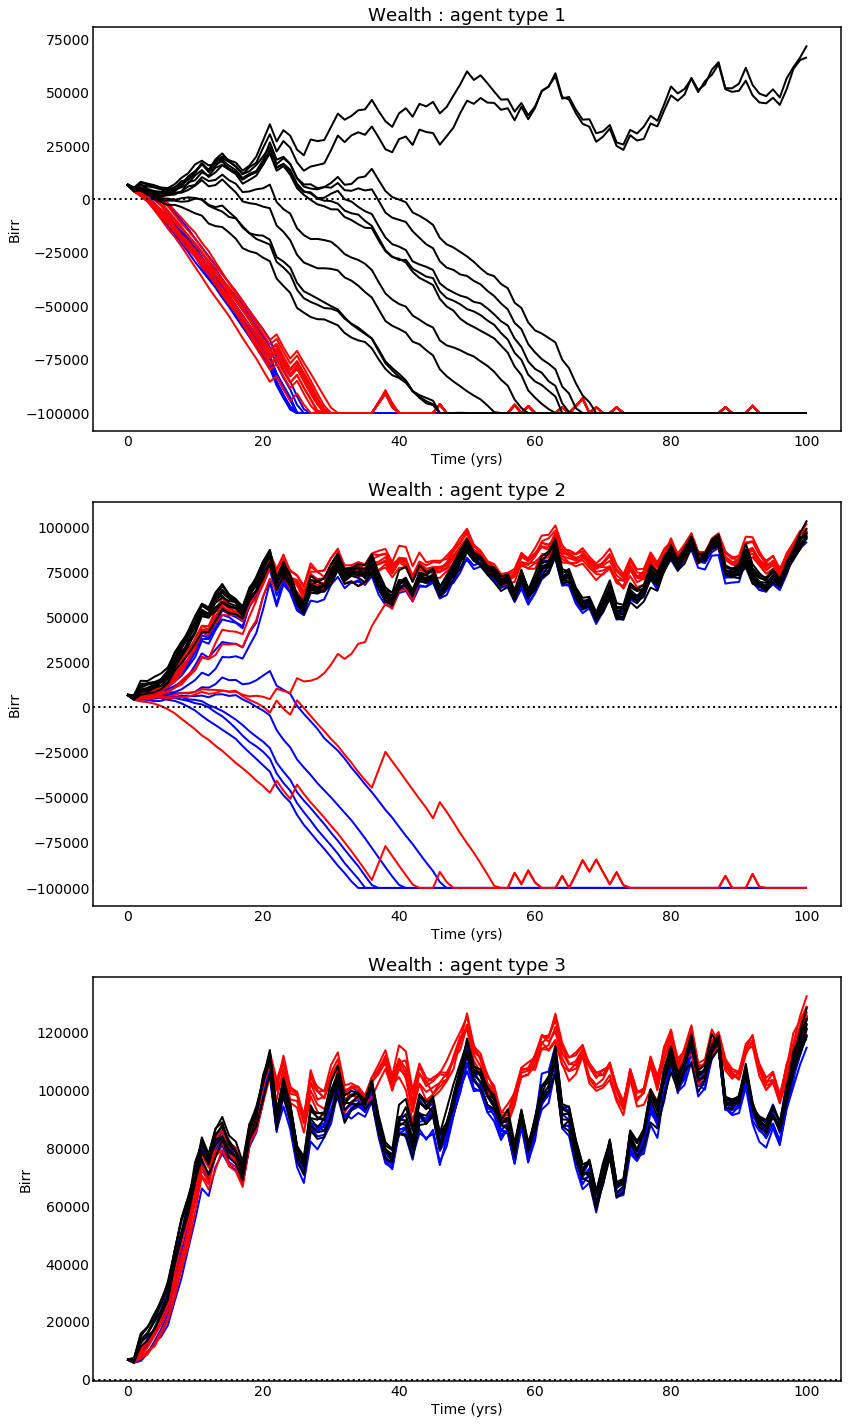

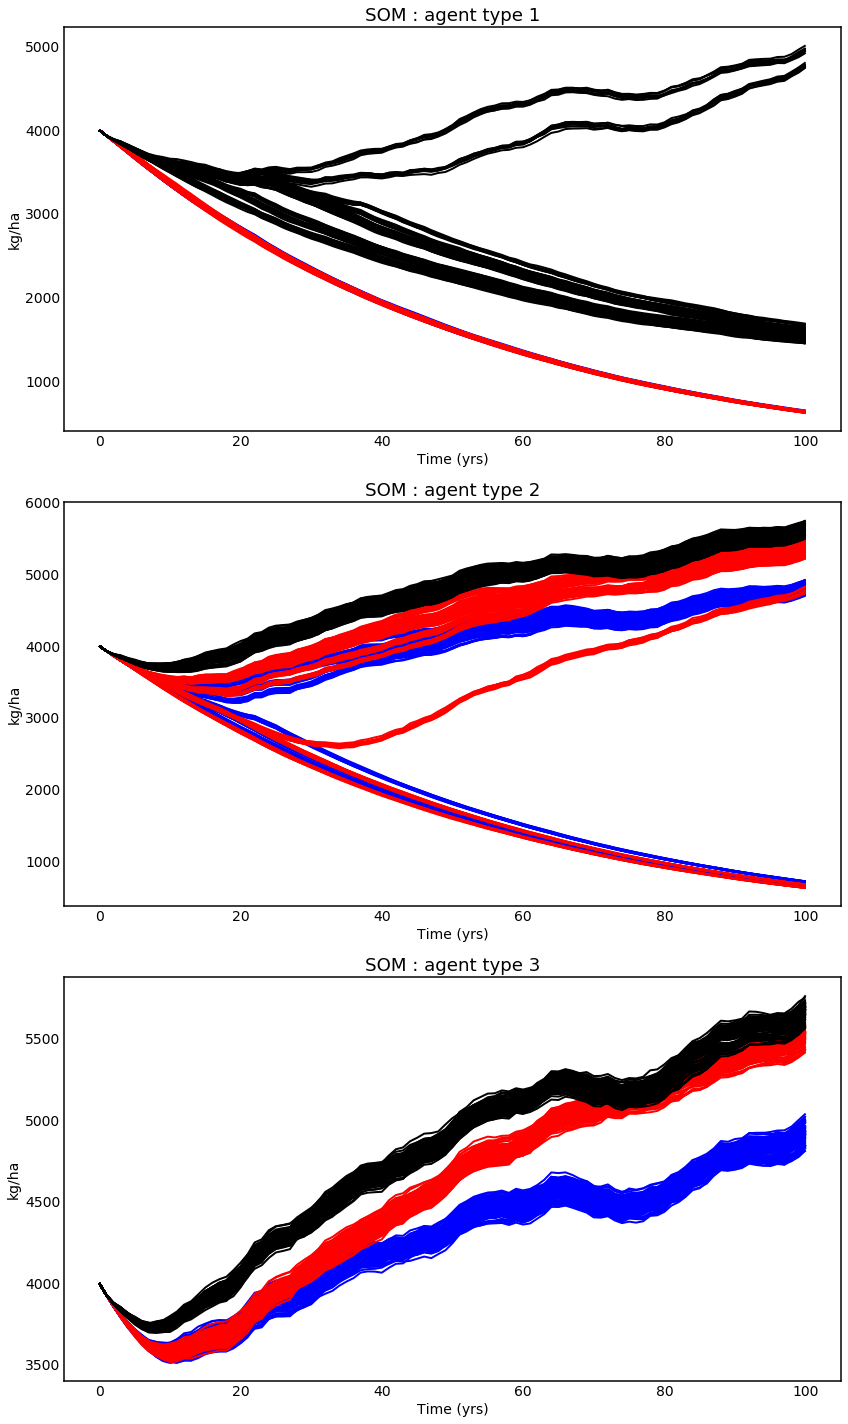

In [5]:
imp.reload(plt_sc)
plt_sc.main(mods, save=False)

In [6]:
inp_base['land']['rain_cropfail_low_SOM']

0.2660667508389827

(-1, 3)

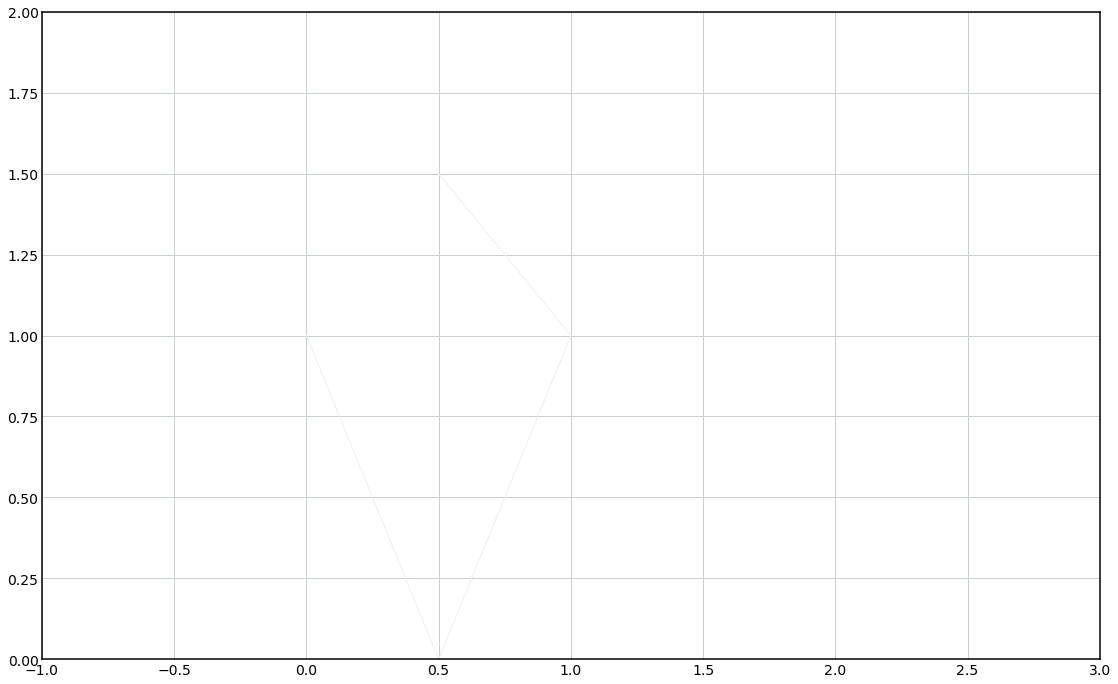

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# ax.arrow(0,0,0.5,0.5, lw=0, width=0, length_includes_head=True, head_width=0.02, color='g')
ax.arrow(0.5,0,0.5,1)
ax.arrow(0.5,0,-0.5,1)
ax.arrow(1,1,-0.5,0.5)
ax.set_ylim([0,2])
ax.set_xlim([-1,3])

(-30000, 30000)

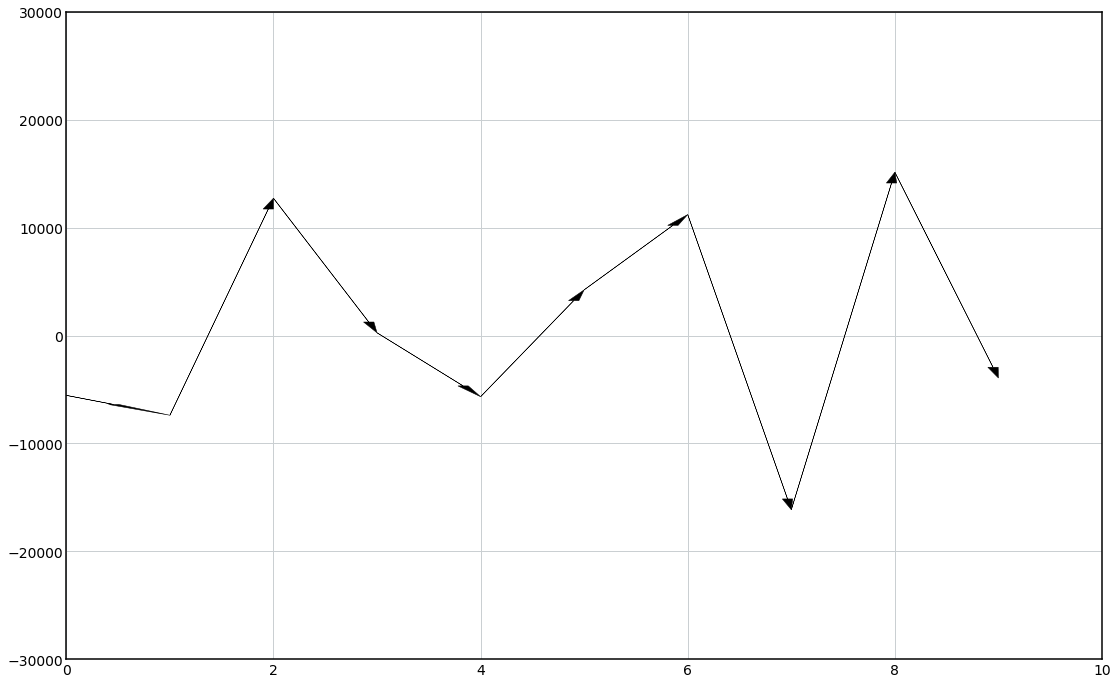

In [75]:
fig, ax = plt.subplots()
xs = np.arange(10)
ys = np.random.normal(size=10) * 10000
for i in range(len(xs)-1):
    ax.arrow(xs[i], ys[i], xs[i+1]-xs[i], ys[i+1]-ys[i], color='k', 
             head_width=0.1,head_length=1000, length_includes_head=True, overhang=0, width=0.001)

ax.set_xlim([0,10])
ax.set_ylim([-30000,30000])

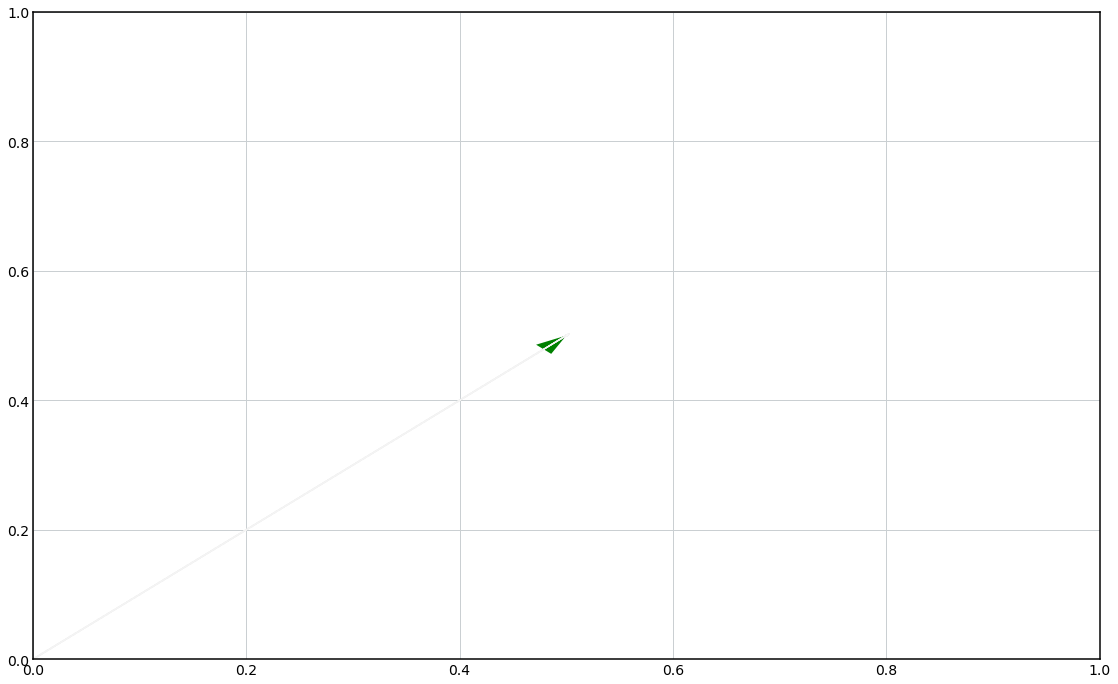

In [25]:

fig